In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

In [3]:
data = pd.read_csv("/Users/kavanamanvi/Desktop/PML/Final Project/heart.csv")

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Check for None values in features

In [8]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Comment

1. There are no None values/empty values

### Data Description

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [12]:
data.describe(include=['O']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


## Exploratory Data Analysis

### Check for correlation

In [15]:
correlation_data = data.drop(columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]).corr()

In [16]:
correlation_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

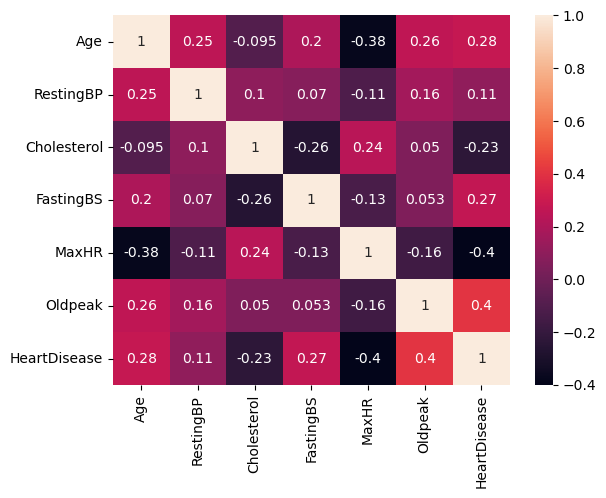

In [17]:
sn.heatmap(correlation_data, annot=True)

### Comments on Correlation

1. From the correaltion matrix and heatmap correlation table, there are no features that are correlated with each other.
2. There is no need to drop any feature/column from the data

### How "Age' Feature is effecting Heart Failure?
### Or Is Age is perfect predictor of Heart Failure?

In [20]:
def pdf_cdf_graph(feature_name):

    heart_disease = data[data["HeartDisease"]==1]
    normal = data[data["HeartDisease"]==0]

    counts1, bin_edges1 = np.histogram(heart_disease[feature_name], bins=10, density=True)
    counts2, bin_edges2 = np.histogram(normal[feature_name], bins=10, density=True)

    pdf_heart_disease = counts1/sum(counts1)
    pdf_normal = counts2/sum(counts2)

    cdf_heart_disease = np.cumsum(pdf_heart_disease)
    cdf_normal = np.cumsum(pdf_normal)

    figure(figsize=(8,8))
    plt.plot(bin_edges1[1:], pdf_heart_disease, label = "pdf_heart_disease")
    plt.plot(bin_edges1[1:], cdf_heart_disease, label = "cdf_heart_disease")

    plt.plot(bin_edges2[1:], pdf_normal, label = "pdf_normal")
    plt.plot(bin_edges2[1:], cdf_normal, label = "cdf_normal")
    
    plt.legend(loc = "upper left")

    plt.xlabel(feature_name)
    plt.show()


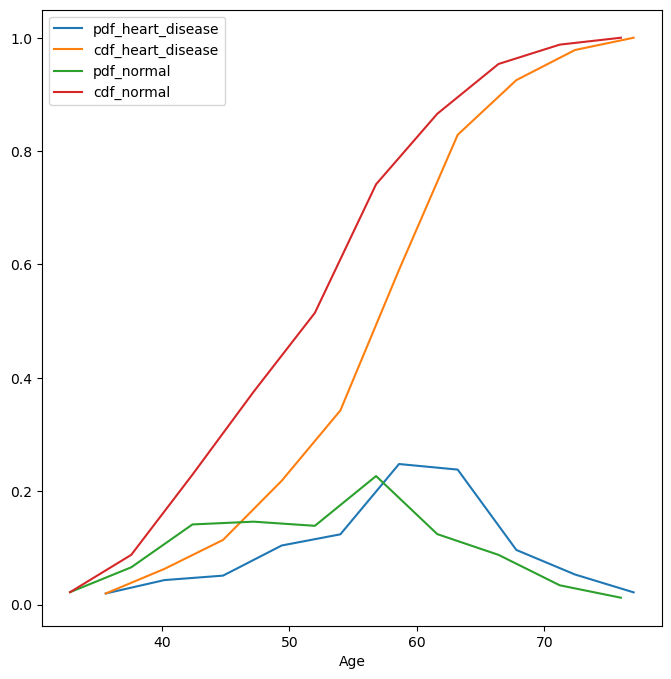

In [21]:
pdf_cdf_graph("Age")

### How RestingBP is impacting traget varibale

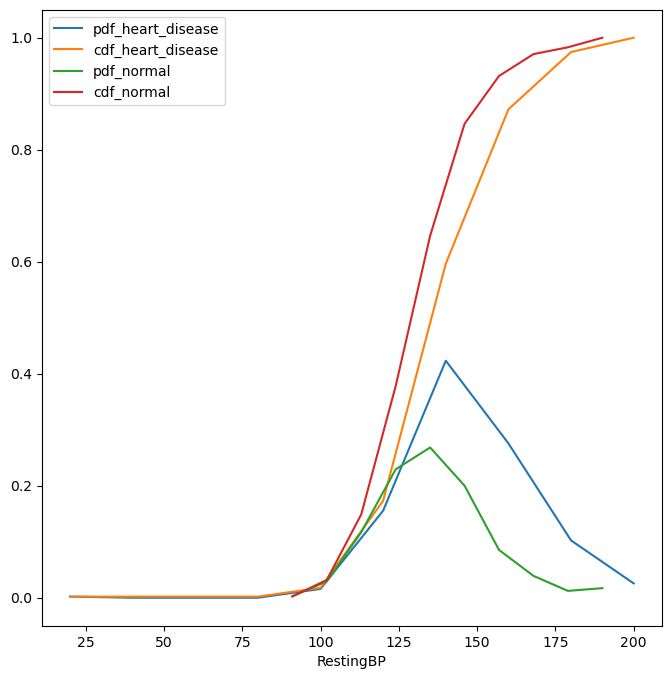

In [23]:
pdf_cdf_graph("RestingBP")

### How Cholestrol is impacting target variable

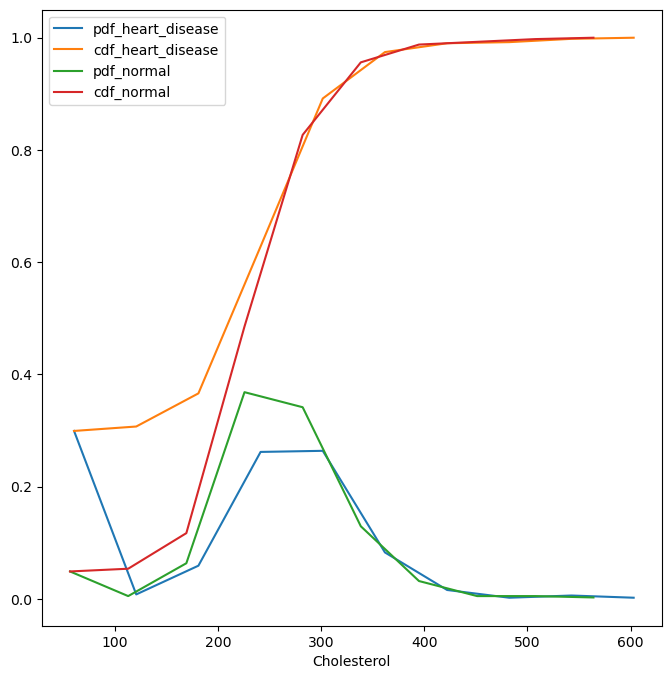

In [25]:
pdf_cdf_graph("Cholesterol")

### How MaxHR can differentiating traget variable

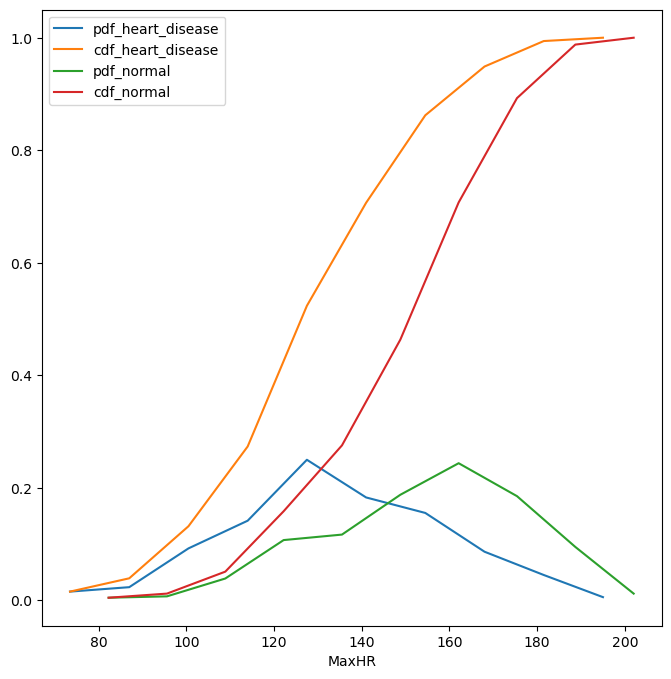

In [27]:
pdf_cdf_graph("MaxHR")

### How Oldpeak is differentiating target variable?

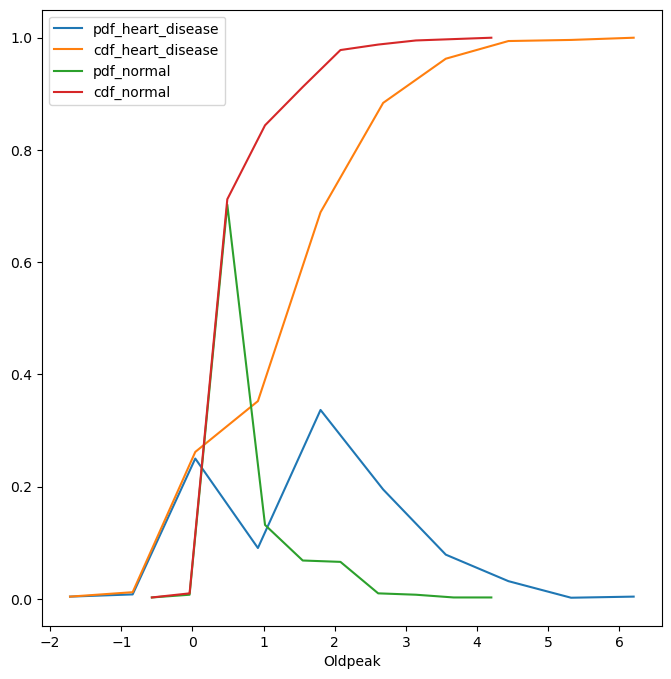

In [29]:
pdf_cdf_graph("Oldpeak")

In [30]:
numerical_features = ["Oldpeak", "MaxHR", "Cholesterol", "RestingBP", "Age"]

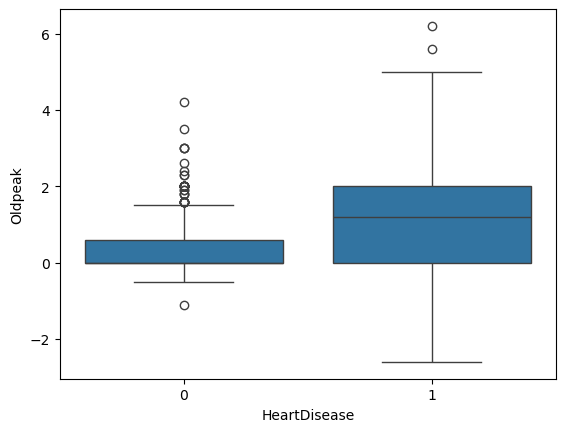

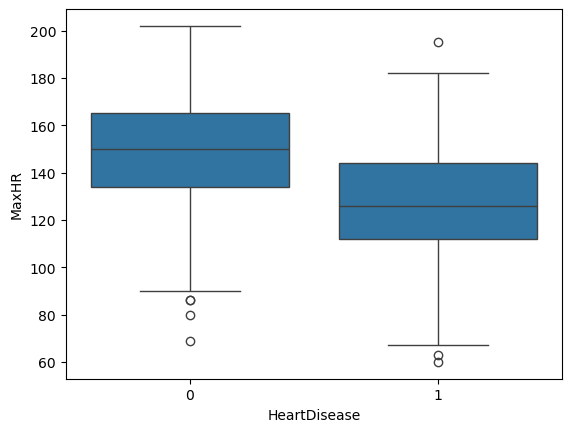

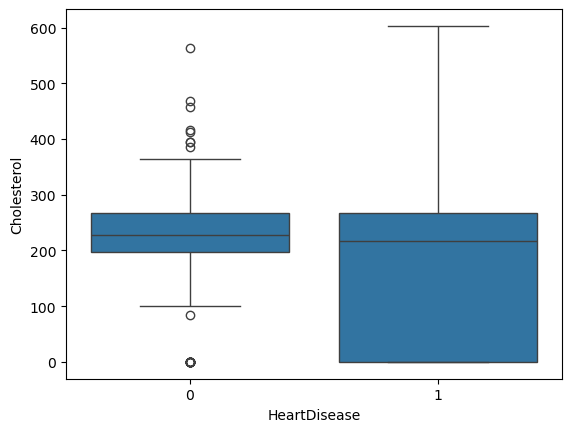

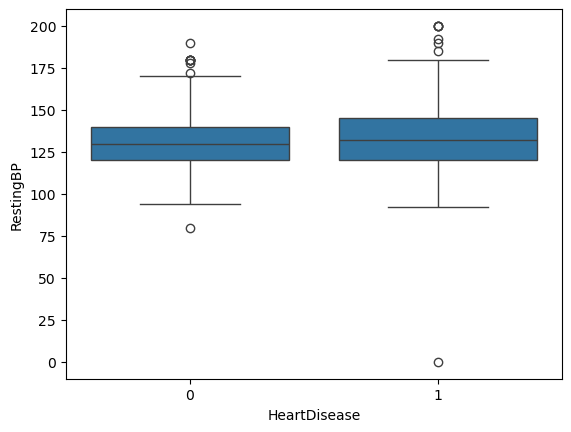

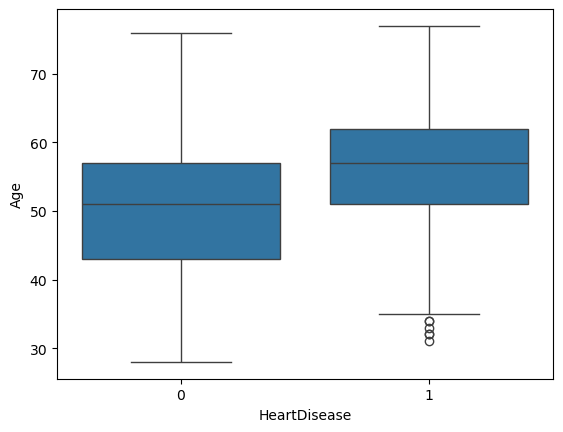

In [31]:
for feature in numerical_features:

    sn.boxplot(x = "HeartDisease", y=feature, data=data)
    plt.show()

## Comments on numerical feature analysis

1. All the numeircal features doesn't show much impact on target variable.
2. All the pdf and cdf graphs of all numericla features doesn't show much variation in differentiating target variable.
3. These numerical features pdfs and cdfs grpahs overlaps between heart disease and normal traget variable.
4. But from data description from kaggle, all these numerical features are important in differentiating target variable.
5. From Box cox plot also most of data differentiating Heart Disease and Normal are over laped.
6. In general, from data description, these fetaures should differentiate the target varibale and the reason for not shoing differnce is due to some noise in the data

## Analysis on categorical variables

In [34]:
categorical_features = list(data.describe(include=['O']).columns)

In [35]:
categorical_features.append("FastingBS")

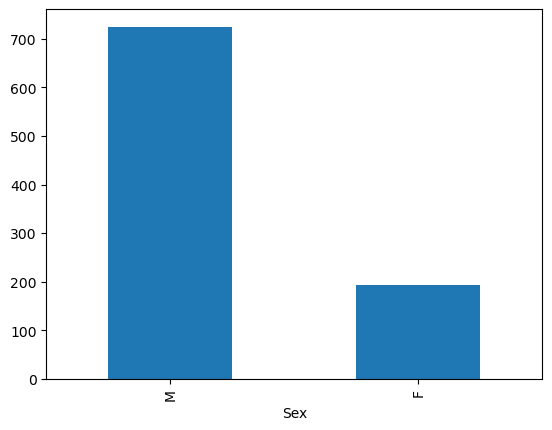

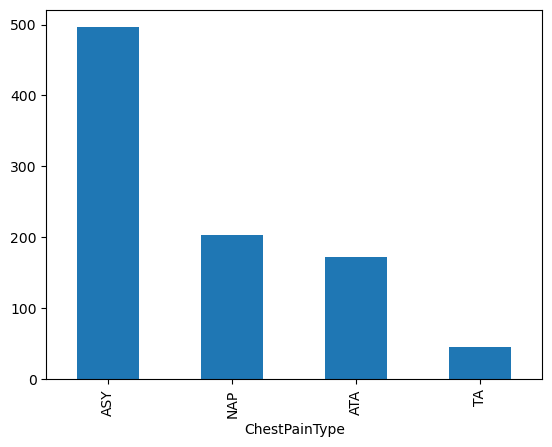

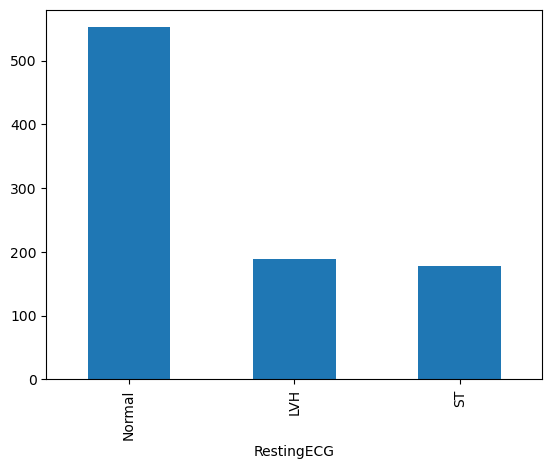

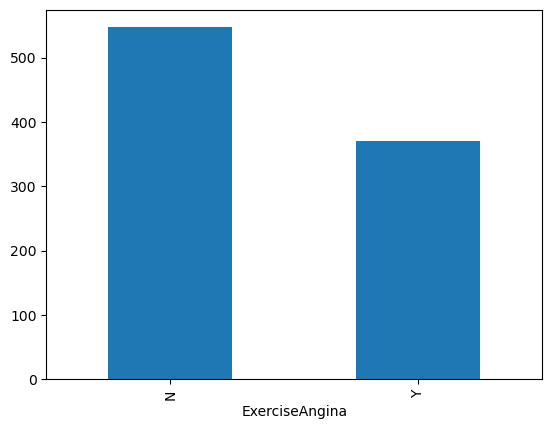

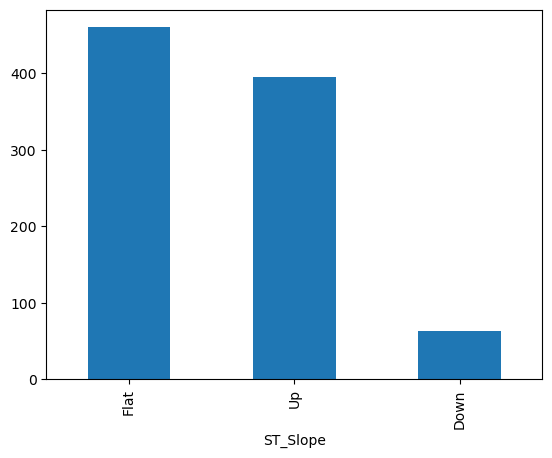

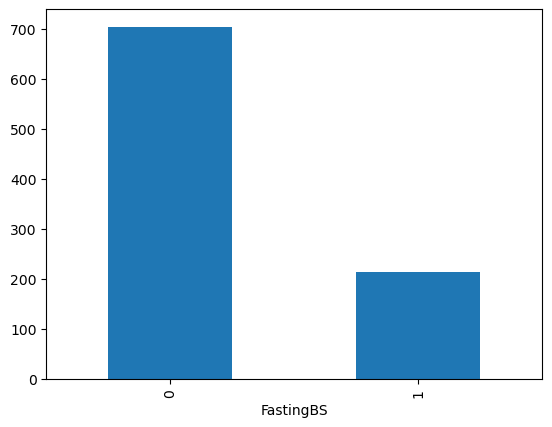

In [36]:
for cat_features in categorical_features:
    data[cat_features].value_counts().plot(kind = 'bar')
    plt.show()

### Comment on Bar plot

1. From bar plot on categorical fetaures, catogrical class values are not well balanced.
2. In "sex" feature, male(70%) data dominates female(30%).
3. In ST_Slope, Flat class domintaes Down class major scale.
4. In ExcerciseAngina, No class are more in number than yes class.
5. For RestingECVG feature, Normal dominates ST class.
6. ChestPainType, ASY dominates TA.

In [38]:
for feature in categorical_features:
    print(data.groupby([feature, "HeartDisease"])["HeartDisease"].count())

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64
ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: HeartDisease, dtype: int64
RestingECG  HeartDisease
LVH         0                82
            1               106
Normal      0               267
            1               285
ST          0                61
            1               117
Name: HeartDisease, dtype: int64
ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
Name: HeartDisease, dtype: int64
ST_Slope  HeartDisease
Down      0                14

### Encoding Feature and standardising numerical values

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [41]:
one_hot_en = OneHotEncoder(sparse_output=False)
std_scale = StandardScaler()

In [42]:
en_data = one_hot_en.fit_transform(data[categorical_features[:-1]])
std_data = std_scale.fit_transform(data[numerical_features])

In [43]:
en_df = pd.DataFrame(en_data, 
                     columns=one_hot_en.get_feature_names_out(categorical_features[:-1]))

In [44]:
std_df = pd.DataFrame(std_data, columns=numerical_features)

In [45]:
final_df = pd.concat([en_df, std_df, data["FastingBS"], data["HeartDisease"]], axis=1)

In [46]:
final_df

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Oldpeak,MaxHR,Cholesterol,RestingBP,Age,FastingBS,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,-0.832432,1.382928,0.825070,0.410909,-1.433140,0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.105664,0.754157,-0.171961,1.491752,-0.478484,0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,-0.832432,-1.525138,0.770188,-0.129513,-1.751359,0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.574711,-1.132156,0.139040,0.302825,-0.584556,0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,-0.832432,-0.581981,-0.034755,0.951331,0.051881,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.293283,-0.188999,0.596393,-1.210356,-0.902775,0,1
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,2.357094,0.164684,-0.053049,0.627078,1.536902,1,1
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.293283,-0.857069,-0.620168,-0.129513,0.370100,0,1
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.832432,1.461525,0.340275,-0.129513,0.370100,0,1


# SVM

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [49]:
# Separate features and target
X = final_df.drop('HeartDisease', axis=1)
y = final_df['HeartDisease']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [52]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [53]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[67 10]
 [17 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



## SVM: Grid Search to find optimal parameters

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear','poly','sigmoid']
}

In [57]:
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [58]:
print("Best parameters:", svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


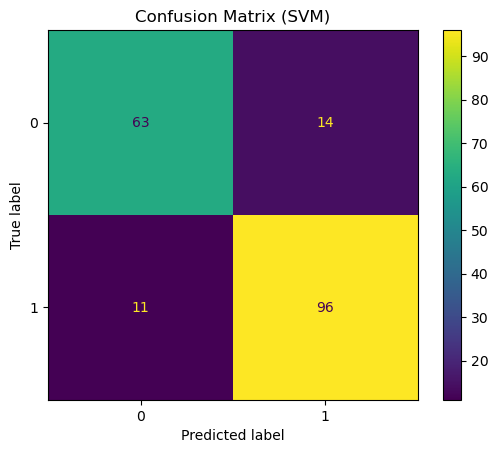

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_best_model, X_test, y_test)
plt.title("Confusion Matrix (SVM)")
plt.show()


In [197]:
# Evaluate on the training data
y_train_pred = svm_best_model.predict(X_train)
print("\nSVM Classification Report with Best Model (Training Data):")
print(classification_report(y_train, y_train_pred))


SVM Classification Report with Best Model (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       333
           1       0.88      0.94      0.91       401

    accuracy                           0.90       734
   macro avg       0.90      0.90      0.90       734
weighted avg       0.90      0.90      0.90       734



In [199]:
# Evaluate on the test data
y_pred = svm_best_model.predict(X_test)
print("\n SVM Classification Report with Best Model (Test Data):")
print(classification_report(y_test, y_pred))


 SVM Classification Report with Best Model (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# Descision Tree

In [63]:
data_df=data
data_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
# Preprocessing
le = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
    data_df[col] = le.fit_transform(data_df[col])

In [66]:
# Separate features and target
X_tree = data_df.drop('HeartDisease', axis=1)
y_tree = data_df['HeartDisease']

In [67]:
# Split the data into training and testing sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [69]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tree, y_train_tree)


DecisionTreeClassifier(random_state=42)

In [70]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tree)

In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test_tree, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


In [73]:
# Print the classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_tree, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



In [74]:

# Feature importance
feature_importance = pd.DataFrame({'feature': X_tree.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           feature  importance
10        ST_Slope    0.404613
7            MaxHR    0.107363
4      Cholesterol    0.107085
0              Age    0.099090
9          Oldpeak    0.071004
2    ChestPainType    0.058537
3        RestingBP    0.037457
1              Sex    0.035152
8   ExerciseAngina    0.030485
5        FastingBS    0.028976
6       RestingECG    0.020238


## Find best model: Decision Tree

In [76]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1,2,3,4,5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

In [77]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

In [78]:
# Perform grid search
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
dt_grid_search.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [79]:
# Get the best model
dt_best_model = dt_grid_search.best_estimator_

In [80]:
# Make predictions on the test set
y_pred = dt_best_model.predict(X_test_tree)

In [81]:
# Print results
print("Best parameters:", dt_grid_search.best_params_)

Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [82]:
print("\nAccuracy:", accuracy_score(y_test_tree, y_pred))


Accuracy: 0.875


In [201]:
# Generate predictions for the training set
y_train_pred = dt_best_model.predict(X_train_tree)

# Print classification reports
print("\nDecision Tree Classification Report - Training Set:")
print(classification_report(y_train_tree, y_train_pred))


Decision Tree Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       333
           1       0.85      0.94      0.89       401

    accuracy                           0.87       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.87      0.87       734



In [203]:
# Generate predictions for the test set
y_test_pred = dt_best_model.predict(X_test_tree)

print("\nDecision Tree  Classification Report - Test Set:")
print(classification_report(y_test_tree, y_test_pred))


Decision Tree  Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [85]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_tree.columns, 'importance': dt_best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           feature  importance
10        ST_Slope    0.643433
2    ChestPainType    0.090923
4      Cholesterol    0.083084
1              Sex    0.056825
8   ExerciseAngina    0.041931
7            MaxHR    0.038682
5        FastingBS    0.021597
0              Age    0.013058
9          Oldpeak    0.010466
3        RestingBP    0.000000
6       RestingECG    0.000000


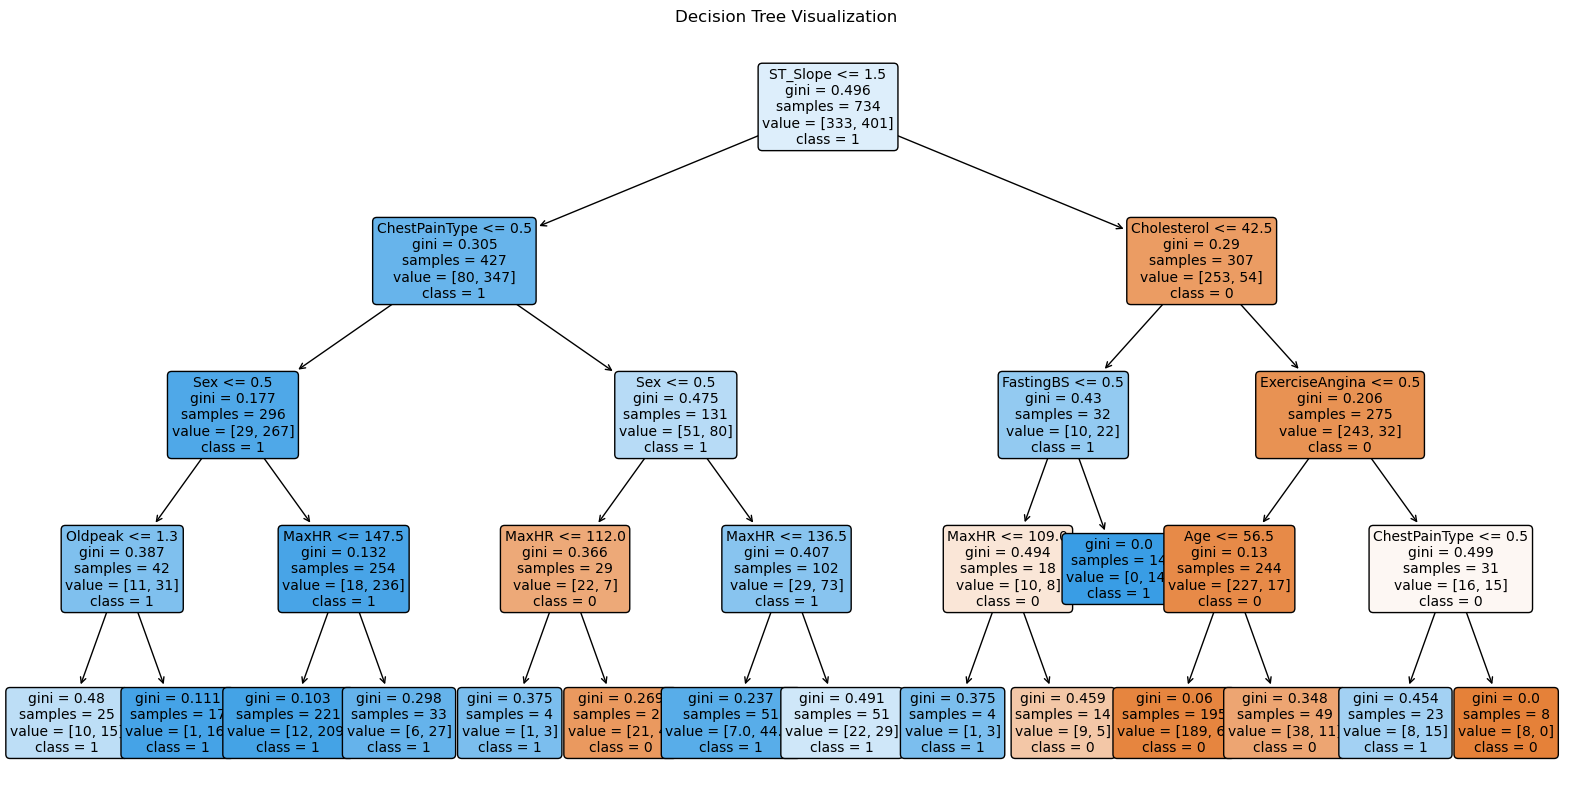

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a plot for the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(
    dt_best_model, 
    feature_names=X_train_tree.columns,  # Replace with actual feature names if available
    class_names=[str(cls) for cls in dt_best_model.classes_],  # Replace with actual class names if available
    filled=True, 
    rounded=True, 
    fontsize=10
)

plt.title("Decision Tree Visualization")
plt.show()


# Random Forest : Bagging

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Bagging: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tree, y_train_tree)
rf_predictions = rf_classifier.predict(X_test_tree)

In [90]:
print("Random Forest (Bagging) Results:")
print("Accuracy:", accuracy_score(y_test_tree, rf_predictions))

Random Forest (Bagging) Results:
Accuracy: 0.8804347826086957


In [205]:
# Predictions for the training set
rf_train_predictions = rf_classifier.predict(X_train_tree)

# Classification report for training data
print("\nRandom Forest : Bagging Classification Report - Training Set:")
print(classification_report(y_train_tree, rf_train_predictions))


Random Forest : Bagging Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [207]:
# Predictions for the test set
rf_test_predictions = rf_classifier.predict(X_test_tree)

# Classification report for test data
print("\n Random Forest : Bagging Classification Report - Test Set:")
print(classification_report(y_test_tree, rf_test_predictions))


 Random Forest : Bagging Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [93]:
# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({'feature': X_tree.columns, 'importance': rf_classifier.feature_importances_})
print("\nTop 5 important features (Random Forest):")
print(feature_importance_rf.sort_values('importance', ascending=False).head())


Top 5 important features (Random Forest):
           feature  importance
10        ST_Slope    0.241312
9          Oldpeak    0.123073
4      Cholesterol    0.107227
7            MaxHR    0.103848
8   ExerciseAngina    0.100046


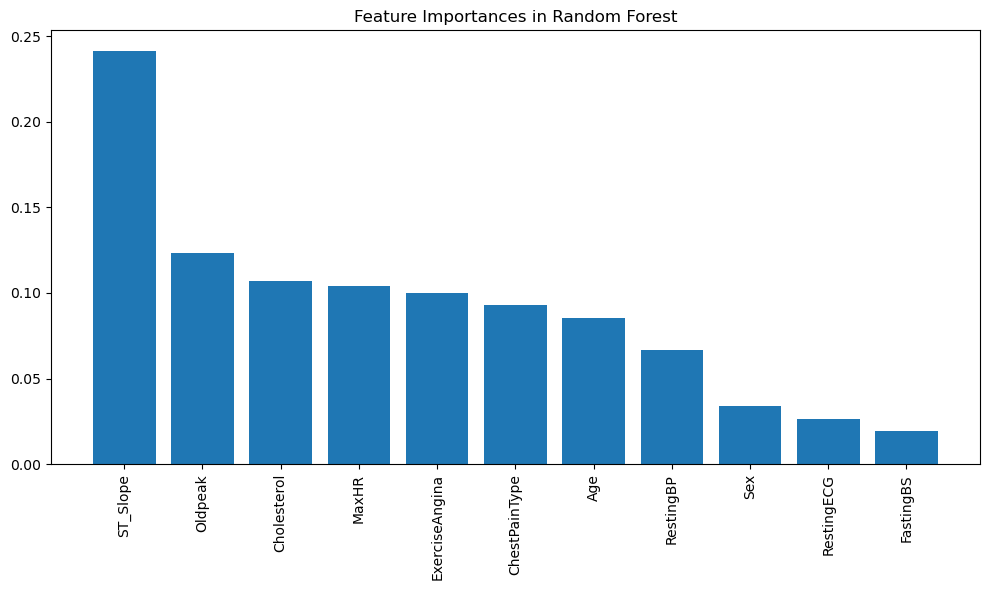

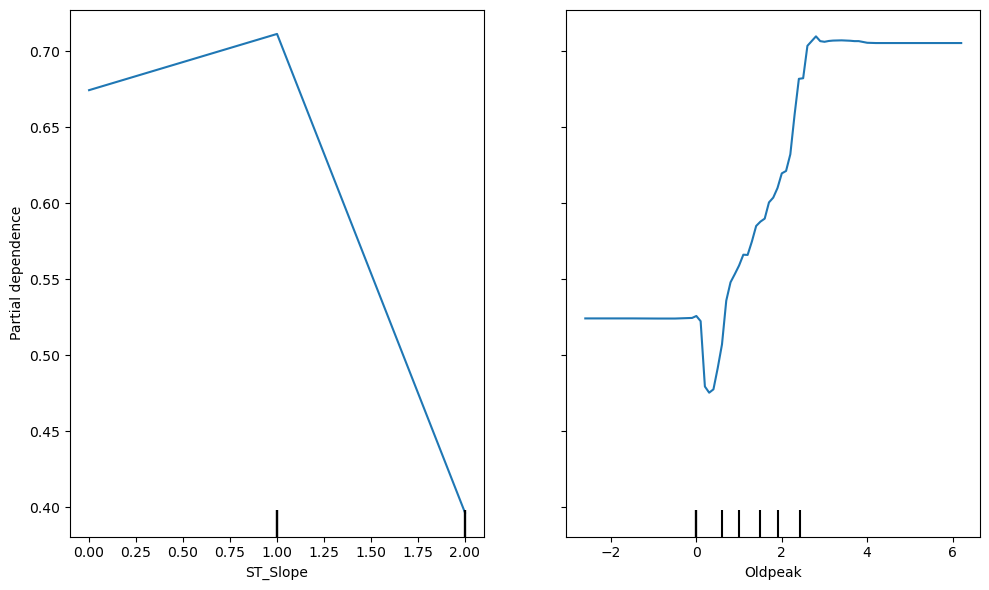

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Extract feature names
feature_names = X_train_tree.columns  # Assuming X_train_tree is a DataFrame

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train_tree.shape[1]), importances[indices])
plt.xticks(range(X_train_tree.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Plot partial dependence for top two features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf_classifier, 
    X_train_tree, 
    features=[indices[0], indices[1]],  # Indices of top 2 features
    feature_names=feature_names, 
    ax=ax
)
plt.tight_layout()
plt.show()


1. A bar plot of feature importances, showing which features the Random Forest model considers most important for classification.
2. A partial dependence plot for the two most important features, illustrating how these features affect the model's predictions.

# Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
# Boosting: Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_tree, y_train_tree)
gb_predictions = gb_classifier.predict(X_test_tree)

In [99]:
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))


Gradient Boosting Results:
Accuracy: 0.875


In [210]:
# Predictions for the training set
gb_train_predictions = gb_classifier.predict(X_train_tree)

# Classification report for the training set
print("\nGradient Boosting Classification Report - Training Set:")
print(classification_report(y_train, gb_train_predictions))


Gradient Boosting Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       333
           1       0.94      0.95      0.95       401

    accuracy                           0.94       734
   macro avg       0.94      0.94      0.94       734
weighted avg       0.94      0.94      0.94       734



In [212]:
# Predictions for the test set
gb_test_predictions = gb_classifier.predict(X_test_tree)

# Classification report for the test set
print("\nGradient Boosting Classification Report - Test Set:")
print(classification_report(y_test, gb_test_predictions))


Gradient Boosting Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [102]:
# Feature importance for Gradient Boosting
feature_importance_gb = pd.DataFrame({'feature': X_tree.columns, 'importance': gb_classifier.feature_importances_})
print("\nTop 5 important features (Gradient Boosting):")
print(feature_importance_gb.sort_values('importance', ascending=False).head())


Top 5 important features (Gradient Boosting):
           feature  importance
10        ST_Slope    0.474190
9          Oldpeak    0.093711
4      Cholesterol    0.088439
2    ChestPainType    0.083655
8   ExerciseAngina    0.062131


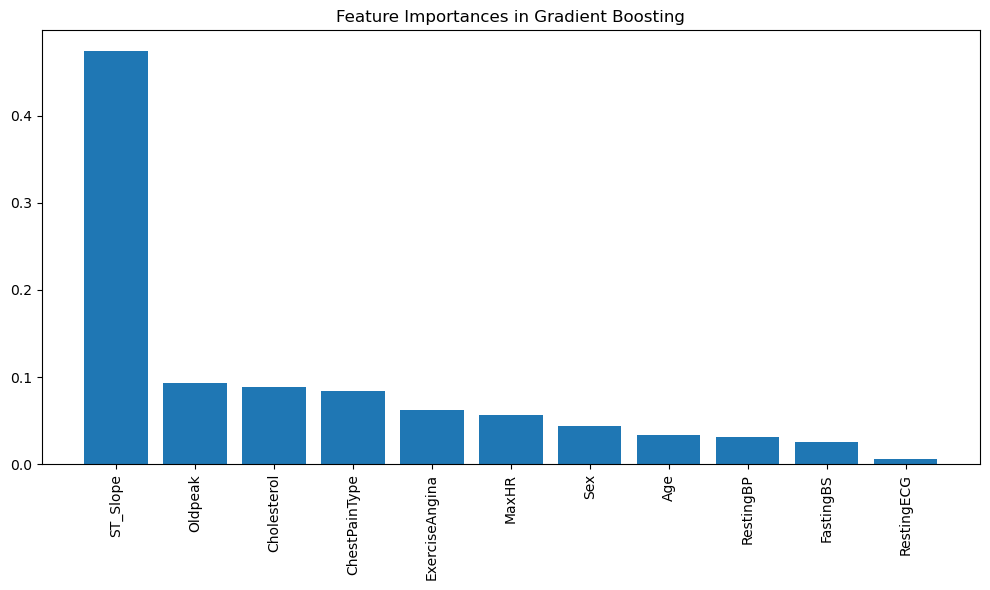

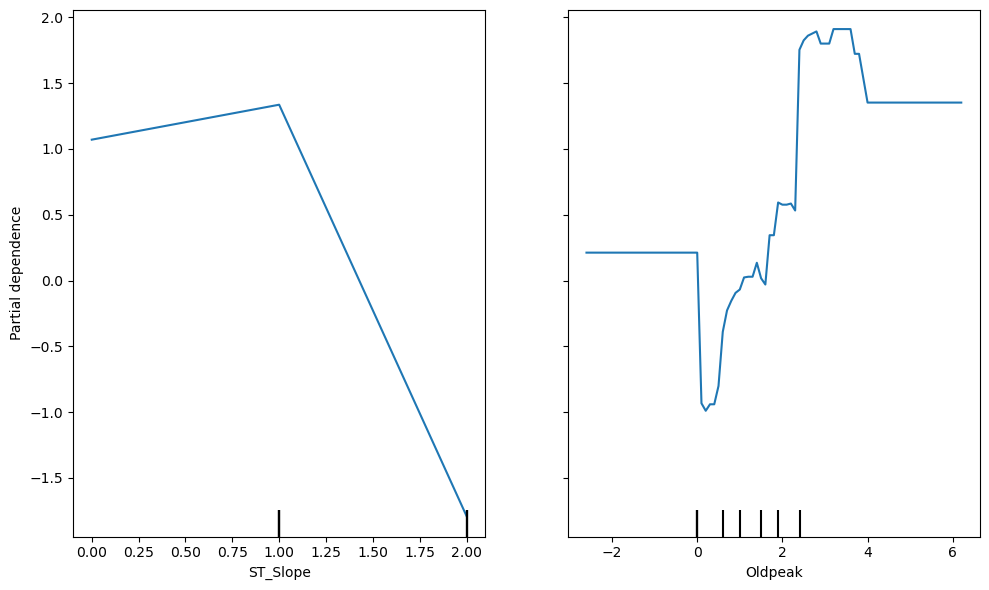

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Assuming X_train_tree is a DataFrame with named columns
feature_names = X_train_tree.columns.tolist()

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances in Gradient Boosting")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Plot partial dependence for top two features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(gb_classifier, X_train_tree, 
                                        features=[feature_names[indices[0]], feature_names[indices[1]]], 
                                        feature_names=feature_names, ax=ax)
plt.tight_layout()
plt.show()

# Ensemble model using best of 4 models either voting or weighted voting system or stacing models

In [105]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [106]:
# 5. Weighted Voting
weighted_clf = VotingClassifier(
    estimators=[
        ('dt', dt_best_model),
        ('rf', rf_classifier),
        ('gb', gb_classifier),
    ],
    voting='soft',
    weights=[1, 2, 2]  
)
weighted_clf.fit(X_train_tree, y_train_tree)
weighted_pred = weighted_clf.predict(X_test_tree)
print(f"Weighted Voting Classifier Accuracy: {accuracy_score(y_test_tree, weighted_pred):.2f}")

Weighted Voting Classifier Accuracy: 0.88


In [107]:
# 6. Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dt_best_model),
        ('rf', rf_classifier),
        ('gb', gb_classifier),
    ],
    final_estimator=RandomForestClassifier(random_state=42)  # Meta-model
)
stacking_clf.fit(X_train_tree, y_train_tree)
stacking_pred = stacking_clf.predict(X_test_tree)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_tree, stacking_pred):.2f}")

Stacking Classifier Accuracy: 0.85


In [108]:
# Predictions for the training set
weighted_train_pred = weighted_clf.predict(X_train_tree)

# Classification report for the training set
print("\n Weighted Voting Classification Report - Training Set:")
print(classification_report(y_train_tree, weighted_train_pred))


 Weighted Voting Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       333
           1       0.95      0.97      0.96       401

    accuracy                           0.96       734
   macro avg       0.96      0.96      0.96       734
weighted avg       0.96      0.96      0.96       734



In [109]:
# Predictions for the test set
weighted_test_pred = weighted_clf.predict(X_test_tree)

# Classification report for the test set
print("\n Weighted VotingClassification Report - Test Set:")
print(classification_report(y_test_tree, weighted_test_pred))


 Weighted VotingClassification Report - Test Set:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



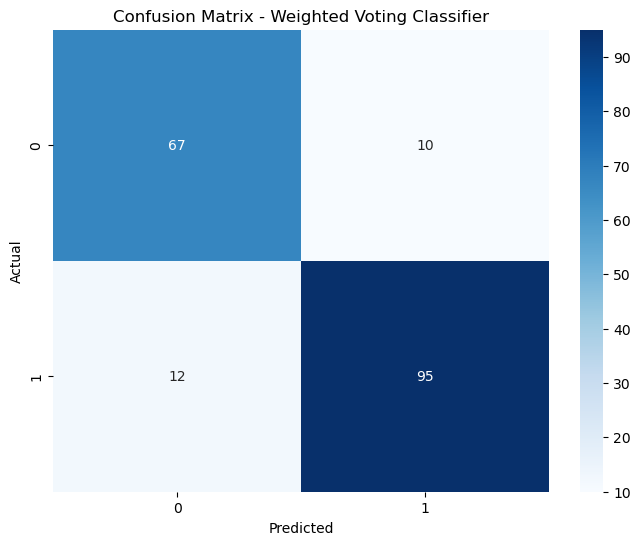

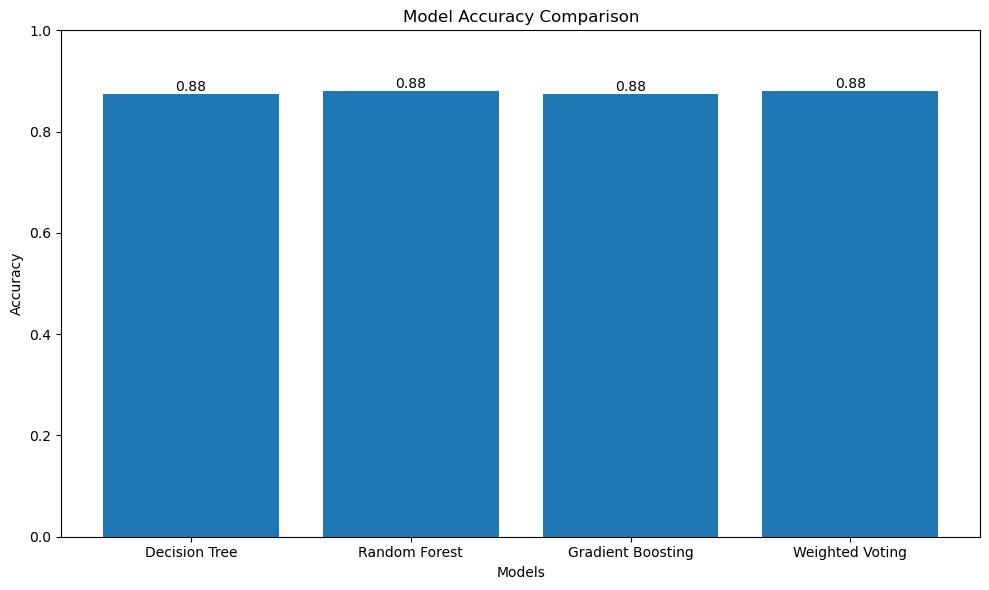

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test_tree, weighted_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Weighted Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Comparison
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Weighted Voting']
accuracies = [
    accuracy_score(y_test_tree, dt_best_model.predict(X_test_tree)),
    accuracy_score(y_test_tree, rf_classifier.predict(X_test_tree)),
    accuracy_score(y_test_tree, gb_classifier.predict(X_test_tree)),
    accuracy_score(y_test_tree, weighted_pred)
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()